In [1]:
# generate_interactive_plot.py
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [30, 40, 20, 10]
})

# Create an interactive line plot using Plotly Express
fig = px.line(data, x='Category', y='Value', title='Interactive Line Plot')  # Change px.scatter to px.line
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Value',
    hovermode='closest',  # Enables closest data point highlighting on hover
    template='plotly',  # Use the default plotly template
    title_x=0.5,  # Center the title
)

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/interactive_line_plot.html')  # Change the filename

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/interactive_line_plot.png', engine='kaleido')  # Change the filename


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Sample data (replace this with your actual data)
movie_genres_categories = pd.read_csv("../clean_Data/movie_genres_categories.csv")

# Set Seaborn style with a white background
sns.set_style("whitegrid")

# Set up a multi-plot grid
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Create a bar plot using Seaborn with the custom palette
sns.barplot(x='Genres', y='mean', data=movie_genres_categories, ci=95, capsize=.2, ax=ax)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue for Each Genre (Appearing More Than 20 Times)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Convert the Seaborn plot to a Plotly Express plot
fig = px.bar(movie_genres_categories, x='Genres', y='mean', title='Revenue for Each Genre',
             labels={'mean': 'Revenue'}, color_discrete_sequence=px.colors.qualitative.Set1)

# Customize the layout
fig.update_layout(xaxis_title='Genre', yaxis_title='Revenue', title_x=0.5)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45, tickmode='array')

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/genre_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/genre_revenue.png', engine='kaleido')
fig.show()


In [4]:
# Sample data (replace this with your actual data)
pos_neg_df = pd.read_csv("../clean_Data/pos_neg_revenue.csv")
columns_of_interest = ['percentage_of_positive_words', 'percentage_of_negative_words', 'percentage_of_neutral_words', 'Revenue_with_inflation']
data_to_plot = pos_neg_df[columns_of_interest]



/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_87492/3139535538.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




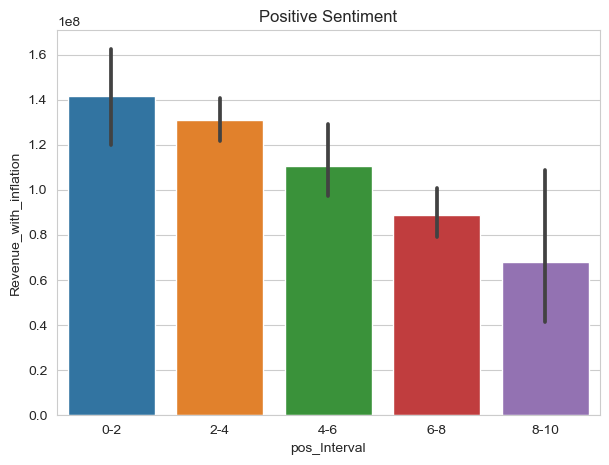

In [8]:
# Set up a multi-plot grid for Positive Sentiment
fig_pos, ax_pos = plt.subplots(figsize=(7, 5))
pos_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['pos_Interval'] = pd.cut(pos_neg_df['percentage_of_positive_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=pos_order)
sns.barplot(x='pos_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_pos, order=pos_order)
ax_pos.set_title('Positive Sentiment')
df = pos_neg_df.groupby('pos_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_pos_px = px.bar(df, x='pos_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"pos_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_87492/2106736412.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




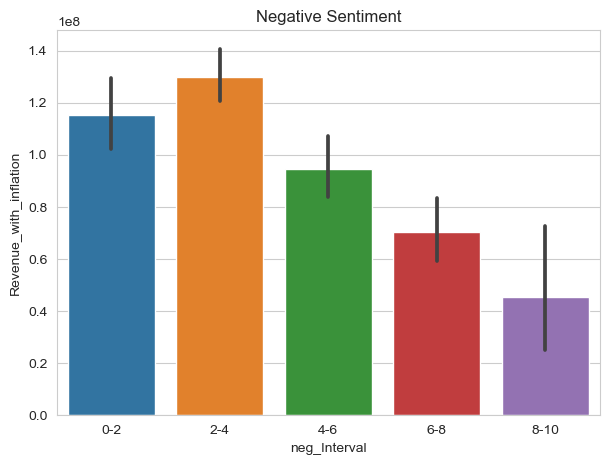

In [9]:
# Set up a multi-plot grid for Negative Sentiment
fig_neg, ax_neg = plt.subplots(figsize=(7, 5))
neg_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['neg_Interval'] = pd.cut(pos_neg_df['percentage_of_negative_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=neg_order)
sns.barplot(x='neg_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_neg, order=neg_order)
ax_neg.set_title('Negative Sentiment')

df = pos_neg_df.groupby('neg_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_neg_px = px.bar(df, x='neg_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"neg_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)



In [17]:
# Create a figure with subplots
fig = make_subplots()

# Add a trace for each plot (only one will be visible at a time)
for trace in fig_neg_px.data:
    fig.add_trace(trace)

for trace in fig_pos_px.data:
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_neg_px.data) +
                                       [False] * len(fig_pos_px.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_neg_px.data) +
                                       [True] * len(fig_pos_px.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for negative and positive sentiments",
    title_x=0.5,  # Centers the title
    xaxis_title="Percentage of negative / positive words",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_neg_px.data) + [False]*len(fig_pos_px.data)}],
                label="Negative words",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_neg_px.data) + [True]*len(fig_pos_px.data)}],
                label="Positive words",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/pos_neg_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/pos_neg_revenue.png', engine='kaleido')

In [18]:

# Sample data (replace this with your actual data)
movie_runtime = pd.read_csv("../clean_Data/movie_runtime.csv")

pos_order = ['0-60', '60-120', '120-180', '180-240', '240-1000']

# Create a new column for intervals
movie_runtime['Interval'] = pd.cut(movie_runtime['movie_runtime'], bins=[0, 60, 120, 180, 240, 1000], labels=pos_order)
df = movie_runtime.groupby('Interval')['Revenue_with_inflation'].mean().reset_index()


# Create the bar plot for mean revenue
fig_runtime_mean = px.bar(df, x='Interval', y='Revenue_with_inflation', text_auto='.2s',
                          title='Mean Revenue for Each Runtime Interval',
                          labels={'Revenue_with_inflation': 'Mean Revenue'},
                          category_orders={"Interval": pos_order},
                          color='Interval')

# Create the box plot for log revenue
fig_runtime_box = px.box(movie_runtime, x='Interval', y='log_revenues',
                         title='Boxplot of Revenue for Each Runtime Interval',
                         labels={'log_revenues': 'Log Revenue'},
                         category_orders={"Interval": pos_order},
                         color='Interval')

# Create a figure with subplots
fig = make_subplots()

# Add a trace for each plot (only one will be visible at a time)
for trace in fig_runtime_mean.data:
    fig.add_trace(trace)

for trace in fig_runtime_box.data:
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_runtime_mean.data) +
                                       [False] * len(fig_runtime_box.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_runtime_mean.data) +
                                       [True] * len(fig_runtime_box.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for Each Runtime Interval",
    title_x=0.5,  # Centers the title
    xaxis_title="Interval",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_runtime_mean.data) + [False]*len(fig_runtime_box.data)}],
                label="Mean Revenue",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_runtime_mean.data) + [True]*len(fig_runtime_box.data)}],
                label="Log Revenue",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/runtime_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/runtime_revenue.png', engine='kaleido')
